In [11]:
!pip install -U ultralytics sahi
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 5.3 MB/s eta 0:00:00:00:01


In [28]:
#Hàm hiển thị ảnh
def hien_thi(uri):
    # Hiển thị bằng matplotlib
    img_path = uri
    img = plt.imread(img_path)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [6]:
#Training
from ultralytics import YOLO
import cv2
from ultralytics import YOLO
import supervision as sv
import numpy as np
import requests

# Load a model
model = YOLO("/kaggle/input/yolov11s/pytorch/default/1/yolo11s.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/kaggle/input/yamlll/data.yaml", epochs=50, imgsz=640, freeze=10, device=[0, 1])

Ultralytics 8.3.200 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/yamlll/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/yolov11s/pytorch/default/1/yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64,

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        151       1198      0.768      0.533      0.622      0.444
              airplane          4         10      0.707        0.4       0.53       0.36
                 apple          4         20          1          0     0.0485     0.0264
              backpack          9         15      0.826        0.4      0.603      0.227
                banana          6         27      0.191      0.289      0.151     0.0653
                  bear          3          4      0.847       0.75      0.755      0.605
                   bed          3          3       0.69          1      0.995      0.545
                 bench          6          6      0.557        0.5      0.565      0.495
               bicycle          7         27       0.83      0.363      0.608      0.316
                  bird          5         14      0.773      0.487      0.684      0.401
                  boat          5          8      0.767       0.25      0.535      0.348
                  boo

In [9]:
# Test
model = YOLO("/kaggle/working/yolo11n.pt")  # load a pretrained model (recommended for training)
model.val(data="/kaggle/input/yamlll/data.yaml")

Ultralytics 8.3.200 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.4 ms, read: 59.3±27.7 MB/s, size: 29.4 KB)
val: Scanning /kaggle/input/81-mini-coco-arial/80-mini-COCO/valid/labels... 151 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 151/151 879.5it/s 0.2s2s
WARNING ⚠️ val: Cache directory /kaggle/input/81-mini-coco-arial/80-mini-COCO/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 3.8it/s 2.6s.1ss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        151       1198   0.000702     0.0302   0.000875   0.000502
                person          4         10   0.000226        0.1   0.000139   6.48e-05
               bicycle          4         20          0          0          0          0
                   car          9         15     0.0017      0.133   0.000998   0.000431
            motorcycle          6         27          0          0          0          0
                 train          3          4          0          0          0          0
                 truck          3          3    0.00224      0.333    0.00218    0.00218
                  boat          6          6          0          0          0          0
         traffic light          7         27          0          0          0          0
          fire hydrant          5         14          0          0          0          0
             stop sign          5          8          0          0          0          0
         parking mete

KeyError: 80

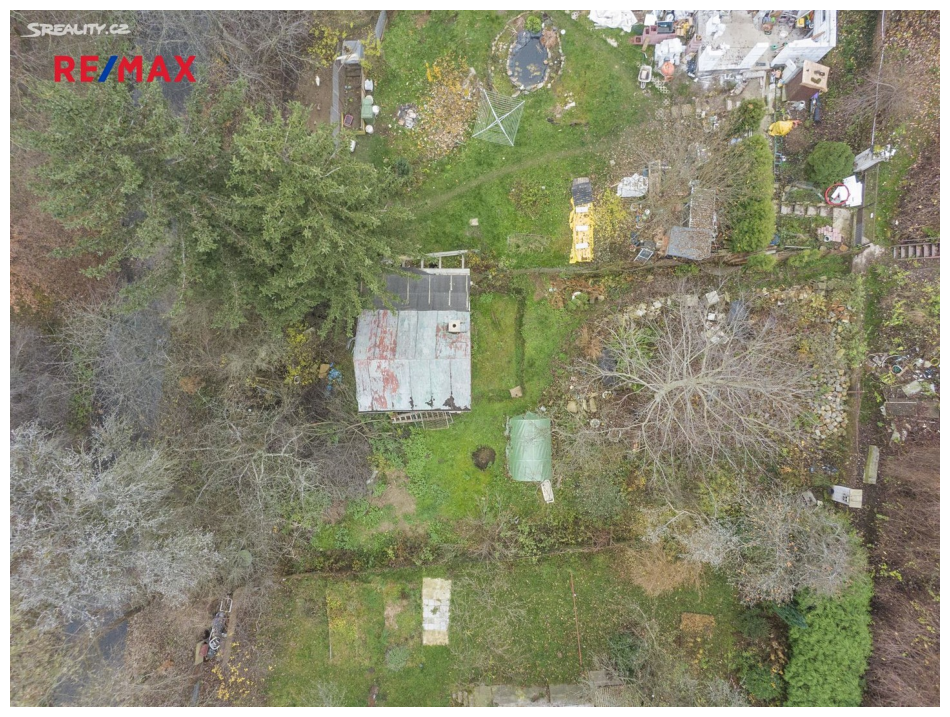

True

In [47]:
#Predict ảnh với base model (chưa finetune)
image_path = f"/kaggle/input/drone-imgsss/prodej-chaty-33-m2-pozemek-33-m2-k-rokytce-praha-9-kyje-img-8.jpg"
image = cv2.imread(image_path)

model = YOLO('/kaggle/input/yolov11s/pytorch/default/1/yolo11s.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

cv2.imwrite("not-finetune.jpg", annotated_image)

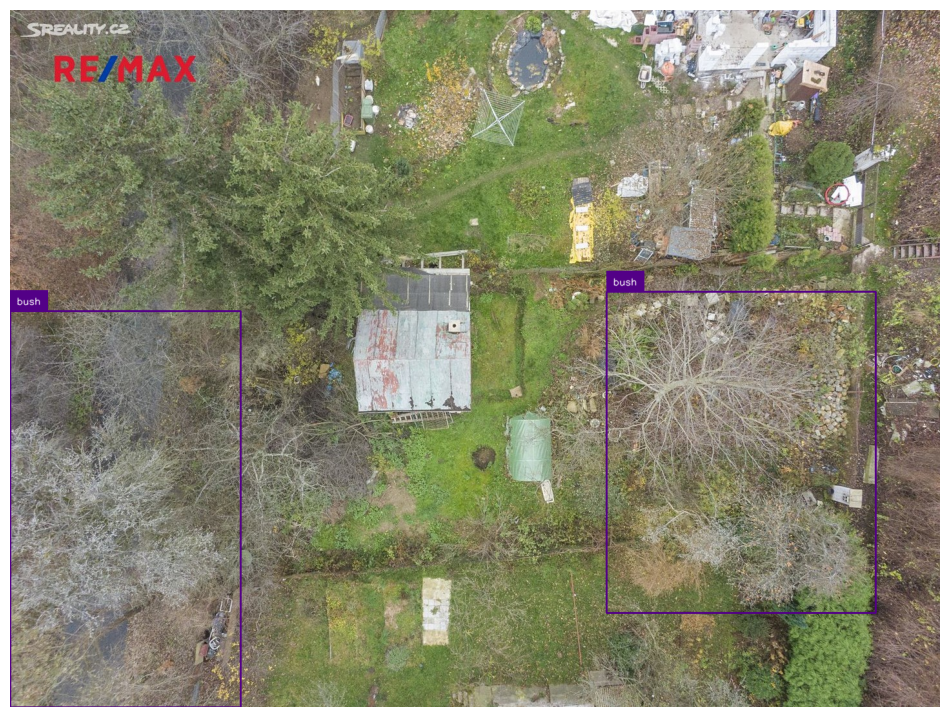

True

In [46]:
#Predict ảnh sau khi finetune 
image_path = f"/kaggle/input/drone-imgsss/prodej-chaty-33-m2-pozemek-33-m2-k-rokytce-praha-9-kyje-img-8.jpg"
image = cv2.imread(image_path)

model = YOLO('/kaggle/working/runs/detect/train4/weights/best.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

cv2.imwrite("finetune.jpg", annotated_image)

Performing prediction on 12 slices.


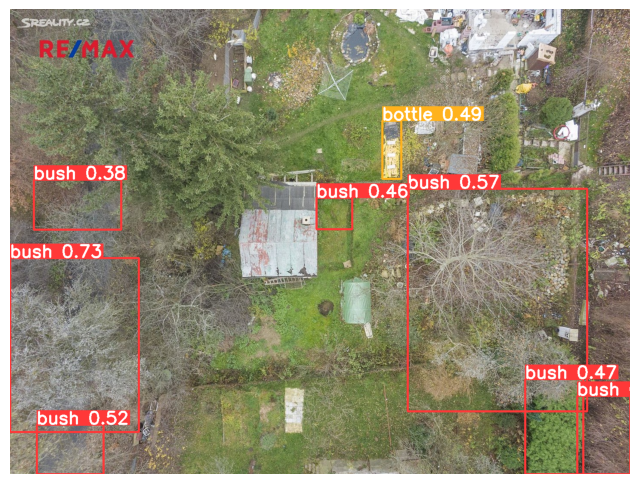

In [49]:
#predict ảnh sau khi finetune + SAHI
from sahi.predict import get_sliced_prediction
from sahi import AutoDetectionModel
import matplotlib.pyplot as plt

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path="/kaggle/working/runs/detect/train4/weights/best.pt",
    confidence_threshold=0.3,
    device="cuda:0",  # or 'cuda:0'
)
# Run Yolo with SAHI
result = get_sliced_prediction(
    "drone-image.jpg",
    detection_model,
    slice_height=512,          # height of each patch
    slice_width=512,           # width of each patch
    overlap_height_ratio=0.2,  # overlap ratio between patches
    overlap_width_ratio=0.2
)

# In kết quả
# print(result.object_prediction_list)

# Vẽ kết quả và lưu
result.export_visuals(export_dir="sahi_outputs/")
hien_thi('/kaggle/working/sahi_outputs/prediction_visual.png')
